# Trabajo Práctico 1 - Matrices de Insumo Producto

In [63]:
import sys
sys.path.append('../src/')
from funciones import *

### Consigna 1 - 

El modelo de Leontief plantea que la economía se divide en distintos sectores donde cada uno de ellos genera una determinada cantidad de producción p:
$$ \mathbf{p = (I − A)^{−1}d} $$

Esta fórmula se compone por un vector $d$ de demanda, la matriz $A$ de insumos y la matriz inversa de $(I-A)$, o $L$, que se conoce como la matriz de Leontief, donde las soluciones que podremos obtener respecto a la producción obtenida por cada sector estarán condicionadas principalmente por la invertibilidad de la matriz de Leontief y los valores $d$ de demanda. 


#### Matrices invertibles
Por un lado, que una matriz sea invertible nos asegura que, cuando apliquemos el método de la eliminación gaussiana para obtener una una matriz triangular, vamos a obtener una única solución particular al sistema (SCD). Lo cual es debido a que una matriz invertible tiene todas sus filas linealmente independientes, ningun vector, sea una fila o columna, es combinación de otra y no se anula ninguna fila. Esta característica nos va a permitir poder despejar nuestro sistema y obtener un valor específico por cada una de las variables que tenga, conformando un único vector, nuestra solución.

*a)* En el primer caso la matriz $(I-A)$ es inversible y, en conclusion a lo que se mencionó anteriormente, vamos a tener un sistema compatible determinado, donde existe una única posible solución a este problema:

$$ p = (I − A)^{−1}d $$

Finalmente podemos estimar un vector específico de la cantidad de producción $p$, ligado a los valores $d$ de demanda y la matriz de insumos $A$. 

*b)* En este caso, la demanda es el vector nulo, por lo tanto la producción que obtendremos es también nula. 

$$ (I - A)p=0 \Longrightarrow p=0 $$ 

Esta solución, perteneciente al núcleo de la matriz, es única debido a que la invertibilidad de la matriz. Así, el sistema que queda conformado es un sistema homogéneo compatible determinado.

En otras palabras, que sea invertible nos asegura que tenga una única solución (SCD) que depende particularmente de la demanda $d$. En el segundo caso b) podemos profundizar un poco más ya que esta $d$ está establecida, entonces sabemos cual es esta única solución ($p=0$).


### Matrices no invertibles

Cuando tenemos una matriz no invertible, las filas o columnas de aquella son linealmente dependientes. Frente a ello, podemos hallar dos casos, que no haya solución alguna (SI) o que haya infinitas soluciones al sistema (SCI). Este primer caso ocurre cuando al triangular la matriz en la eliminación gaussiana llegamos a un absurdo. Por otro lado, en el segundo caso, no llegamos a este punto, ya que cuando se anulan las filas, el término independiente también es nulo.

*c)* En este punto, cuando la matriz no es inversible, no podemos asegurar a priori que haya una solución particular, sino que puede que no haya solución (sistema incompatible) o que, de hecho, haya infinitas soluciones (sistema compatible indeterminado).

$$ (I-A)p=d $$

Vamos a poder afirmar que hay solución solo cuando d pertenece a $Im(I-A)$, pues en ese caso existe necesariamente p tal que 
$ (I-A)p=d $. d va a pertenecer a $Im(I-A)$ si y solo si es combinación lineal de las columnas de $I-A$, pues estas generan $Im(I-A)$ .

*d)* Por último, al establecer d=0 obtenemos la solución particular p=0, pero la matriz al no ser invertible tiene infinitas soluciones (sistema compatible indeterminado), y el núcleo tiene una dimensión mayor a cero.

$$ (I - A)p=0 $$

---

---

### Consigna 3

Sean $$\mathbf{A = \begin{pmatrix} 0.3 & 0.0 & 0.1 \\ 0.05 & 1.0 & 0.2 \\ 0.1 & 0.15 & 0.1 \end{pmatrix}, \ \ d = \begin{pmatrix} 100 \\ 100 \\ 300 \end{pmatrix}}$$
Entonces, para obtener la producción $\mathbf{p}$ necesaria de cada sector para satisfacer la demanda interna, representada por $\mathbf{A}$ y la demanda externa, representada por $\mathbf{d}$, resolvemos la ecuación del modelo de Leontief:
$$ \mathbf{p = (I-A)^{-1}d} $$
En este proceso usamos funciones que calculan la factorización LU con pivoteo parcial y la inversa de una matriz dada su factorización LU y su matriz de permutación P. 

In [220]:
A = np.array([[0.3,0,0.1],[0.05,1,0.2],[0.1,0.15,0.1]])
d = np.array([[100],[100],[300]])
I = np.eye(3)
L, U, P = calcularLU(I-A)
M = inversaLU(L,U, P)
print(M@d)

[[   68.96551724]
 [-5149.42528736]
 [ -517.24137931]]


Obtenemos que $$\mathbf{p \approx \begin{pmatrix} 69 \\ -5149 \\ -517 \end{pmatrix} }$$
En el contexto económico estos valores no tienen sentido, ya que ante una demanda externa positiva la producción debería ser positiva para satisfacerla, lo cual en este caso no se refleja pues los valores de producción de los sectores representados por las filas dos y tres en el vector $\mathbf{p}$ son negativos. Esto sugiere que la aplicación económica limita los valores posibles para $\mathbf{A}$ y $\mathbf{d}$.

Dado que en un contexto económico no deberíamos tener limitaciones en cuanto a la demanda posible a recibir, ya que justamente se busca encontrar la cantidad de producción necesaria para satisfacerla, nos enfocamos en estudiar la matriz $\mathbf{A}$ dada. El modelo de Leontief menciona que $\mathbf{A}$ no es una matriz cualquiera, sino que es la matriz de flujo, significando esto que la columna $j$ representa los insumos requeridos de cada sector $i$ para satisfacer la producción del sector $j$.  Si observamos la columna 2 vemos que el sector 2 requiere una unidad de producto del sector 2 para producir una unidad de su producto, lo que significa que este sector solo produce para sí mismo (consume en la misma proporcion en la que produce), impidiendo asi satisfacer cualquier demanda interna (pues los otros sectores también requieren del producto 2) y externa, cosa que se refleja en el cálculo de la matriz de producción a traves de los valores negativos, e indica que se trata de una economia inviable y el sector 2 de un sector ineficiente.  


---

### Consigna 4

El modelo de Leontief permite calcular la producción $\mathbf{p}$ requerida en cada sector para cubrir tanto la demanda interna como externa. Esto se basa en resolver una ecuación de la forma $$ \mathbf{p=(I-A)^{-1}d} $$ Donde la matriz $\mathbf{A}$ describe los insumos requeridos por cada sector para generar su producto, $\mathbf{I}$ es la matriz identidad y el vector $\mathbf{d}$ la demanda externa.

Consideremos el caso en el que la demanda externa $\mathbf{d}$ cambia en un $\mathbf{\Delta d} = \begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix}
$. Entonces, la demanda externa se convierte en: $$ \mathbf{d' = d + \begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix}}$$

Queremos saber cuánto cambia la producción $\mathbf{p}$ como consecuencia de esto.

La nueva producción, correspondiente a la nueva demanda, está dada por: $$ \mathbf{p'=(I-A)^{-1}d'} $$

Entonces la variación de $\mathbf{p}$ es la diferencia entre la nueva producción y la anterior al cambio de la demanda 
$$\mathbf{ \Delta p = p' - p }$$

Sustituyendo las ecuaciones para $\mathbf{p}$ y $\mathbf{p'}$, y tomando factor común $\mathbf{(I-A)^{-1}}$ queda que 
$$\mathbf{\Delta p = (I-A)^{-1}(d'-d) = (I-A)^{-1} \Delta d} $$

Esta ecuación es una consecuencia de la linealidad del modelo, obtenemos que la matriz de Leontief actúa como aplicación lineal que tranforma los cambios en la demanda externa directamente en cambios en la producción. Más aún, como $\mathbf{\Delta d = \begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix}}$ el producto $\mathbf{(I-A)^{-1}\Delta d}$ nos da la tercera columna de la matriz de Leontief. Este hecho nos hace notar que, en general, la columna $\mathbf{i}$ de la matriz de Leontief te dice cuánto debe aumentar la producción en cada sector si hay un incremento unitario en la demanda del sector $\mathbf{i}$. 

---

### Consigna 5

La matriz de coeficientes técnicos $\mathbf{A}$ viene dada por la expresión
$$ \mathbf{A = ZP^{-1}} $$ 
Donde $\mathbf{Z}$ es la matriz de insumos y $\mathbf{ P^{-1} }$ la inversa de la matriz diagonal con el producto total de cada sector. De esta manera se tiene que $a_{ij}= \frac{z_{ij}}{p_{jj}}$

Si tenemos la siguiente economía, caracterizada por su matriz de insumos y su matriz diagonal de producto total:
$$ \mathbf{ Z = \begin{pmatrix} 350 & 0 & 0 \\ 50 & 250 & 150 \\ 200 & 150 & 550 \end{pmatrix}, \ \ P = \begin{pmatrix} 1000 & 0 & 0 \\ 0 & 500 & 0 \\ 0 & 0 & 1000 \end{pmatrix} } $$

Debido a la simplicidad de su estructura, es fácil ver que la inversa de una matriz diagonal existe si ningún elemento de la diagonal es nulo, y en ese caso la inversa es la matriz diagonal cuyos elementos son los recíprocos de la matriz original:  $$ \mathbf{ P^{-1} = \begin{pmatrix} \frac{1}{1000} & 0 & 0 \\ 0 & \frac{1}{500} & 0 \\ 0 & 0 & \frac{1}{1000} \end{pmatrix} }$$

Luego hacemos el producto y obtenemos la matriz A:

$$ \mathbf{ A = \begin{pmatrix} 350 & 0 & 0 \\ 50 & 250 & 150 \\ 200 & 150 & 550 \end{pmatrix} \begin{pmatrix} \frac{1}{1000} & 0 & 0 \\ 0 & \frac{1}{500} & 0 \\ 0 & 0 & \frac{1}{1000} \end{pmatrix} = \begin{pmatrix} \frac{350}{1000} & 0 & 0 \\ \frac{50}{1000} & \frac{250}{500} & \frac{150}{1000} \\ \frac{200}{1000} & \frac{150}{500} & \frac{550}{1000} \end{pmatrix} = \begin{pmatrix} \frac{7}{20} & 0 & 0 \\ \frac{1}{20} & \frac{1}{2} & \frac{3}{20} \\ \frac{1}{5} & \frac{3}{10} & \frac{11}{20} \end{pmatrix}}$$

La matriz de Leontief viene dada por $\mathbf{L := (I-A)^{-1}}$:

$$\mathbf{L = \begin{pmatrix} 1-\frac{7}{20} & 0 & 0 \\ -\frac{1}{20} & 1-\frac{1}{2} & -\frac{3}{20} \\ -\frac{1}{5} & -\frac{3}{10} & 1-\frac{11}{20} \end{pmatrix}^{-1} = \begin{pmatrix} \frac{20}{13} & 0 & 0 \\ \frac{35}{78} & \frac{5}{2} & \frac{5}{6} \\ \frac{115}{117} & \frac{5}{3} & \frac{25}{9} \end{pmatrix} }$$



In [3]:
Z = np.array([[350, 0, 0], [50, 250, 150],[200, 150, 550]])
P = np.array([[1000, 0, 0], [0, 500, 0], [0, 0, 1000]])
I = np.eye(3)

#Obtenemos los coeficientes técnicos
L, U, _ = calcularLU(P)
P_inv = inversaLU(L,U)
A = Z@P_inv

#Obtenemos la matriz de Leontief
L, U, P = calcularLU(I-A)
Leontief = inversaLU(L,U,P)
Leontief

array([[1.53846154, 0.        , 0.        ],
       [0.44871795, 2.5       , 0.83333333],
       [0.98290598, 1.66666667, 2.77777778]])

---

### Consigna 6

La formula (4) nos dice que:

$$ \large \left( \begin{pmatrix}
I_{n \times n} & 0_{n \times m} \\
0_{m \times n} & I_{m \times m}
\end{pmatrix} - \begin{pmatrix}
A^{rr} & A^{rs} \\
A^{sr} & A^{ss}
\end{pmatrix} \right) 
\begin{pmatrix}
p^{r} \\
p^{s}
\end{pmatrix} =
\begin{pmatrix}
d^{r} \\
d^{s}
\end{pmatrix}
$$

Consideremos ahora una variación en $d^{r}$, lo que nos lleva a obtener una nueva demanda $d' ^{r}$. Al hacer esto, debemos tomar en cuenta las posibles variaciones que esto genere sobre $p^{r}$ y $p^{s}$, y que darán lugar a $p'^{r}$ y $p'^{s}$. Con esto en mente, podemos derivar la siguiente expresión ante cambios en $d^{r}$:    

 $$ \large \left( \begin{pmatrix}
I_{n \times n} & 0_{n \times m} \\
0_{m \times n} & I_{m \times m}
\end{pmatrix} - \begin{pmatrix}
A^{rr} & A^{rs} \\
A^{sr} & A^{ss}
\end{pmatrix} \right) 
\begin{pmatrix}
p'^{r} \\
p'^{s}
\end{pmatrix} =
\begin{pmatrix}
d'^{r} \\
d^{s}
\end{pmatrix}
$$

Si restamos la expresión 1 a la 2 obtenemos:

$$ \large \left( \begin{pmatrix}
I_{n \times n} & 0_{n \times m} \\
0_{m \times n} & I_{m \times m}
\end{pmatrix} - \begin{pmatrix}
A^{rr} & A^{rs} \\
A^{sr} & A^{ss}
\end{pmatrix} \right) 
\left(
\begin{pmatrix}
p'^{r} \\
p'^{s}
\end{pmatrix} - 
\begin{pmatrix}
p^{r} \\
p^{s}
\end{pmatrix}
\right)=
\begin{pmatrix}
d'^{r} \\
d^{s}
\end{pmatrix}  - 
\begin{pmatrix}
d^{r} \\
d^{s}
\end{pmatrix}
$$       

O equivalentemente:

$$ \large \left( \begin{pmatrix}
I_{n \times n} & 0_{n \times m} \\
0_{m \times n} & I_{m \times m}
\end{pmatrix} - \begin{pmatrix}
A^{rr} & A^{rs} \\
A^{sr} & A^{ss}
\end{pmatrix} \right) 
\begin{pmatrix}
\Delta p^{r} \\
\Delta p^{s}
\end{pmatrix} =
\begin{pmatrix}
\Delta d^{r} \\
0
\end{pmatrix} 
$$      

Donde  $ \ \Delta p^{r} = p'^{r} - p^{r} $ , $ \ \Delta p^{s} = p'^{s} - p^{s} $ y $ \ \Delta d^{r} = d'^{r} - d^{r} $ . De la expresión anterior se puede despejar $ \Delta p^{r} $ como sigue :

$$ \large \begin{pmatrix}
I - A^{rr}  & -A^{rs} \\
-A^{sr} & I -  A^{ss}
\end{pmatrix} 
\begin{pmatrix}
\Delta p^{r} \\
\Delta p^{s}
\end{pmatrix} =
\begin{pmatrix}
\Delta d^{r} \\
0
\end{pmatrix} \implies \\
\begin{pmatrix}
    (I -  A^{rr}) \ \Delta p^{r} - A^{rs} \Delta p^{s} \\
    -A^{sr} \ \Delta p^{r} + (I - A^{ss}) \Delta p^{s}
\end{pmatrix} =
\begin{pmatrix}
    \Delta d^{r} \\
    0
\end{pmatrix}  \implies \newline
\left\{
\begin{array}{l}
(I -  A^{rr}) \ \Delta p^{r} - A^{rs} \Delta p^{s} = \Delta d^{r} \\
-A^{sr} \ \Delta p^{r} + (I - A^{ss}) \Delta p^{s} = 0
\end{array}
\right.
$$      

Notar que el producto por bloques de la matriz de la izquierda con la de la derecha es realizable, dado que la cantidad de filas de bloques de la de la derecha coincide con la cantidad de columnas de bloques de la izquierda, y porque las dimensiones de los bloques son las adecuadas para realizar los productos bloque a bloque ( $I-A^{rr} \in R^{n \times n} \ \ y \ \ \Delta p^{r} \in R^{n \times 1} ,$   $-A^{rs} \in R^{n \times m} \ \ y \ \ \Delta p^{s} \in R^{m \times 1} ,$ $-A^{sr} \in R^{m \times n} \ \ y \ \ \Delta p^{r} \in R^{n \times 1} ,$ $I-A^{ss} \in R^{m \times m} \ \ y \ \ \Delta p^{s} \in R^{m \times 1} $ ). 

Suponiendo $(I - A^{ss})$ inversible por el modelo de región simple visto en la consigna 4:

$$ \large \implies
\left\{
\begin{array}{l}
(I -  A^{rr}) \ \Delta p^{r} - A^{rs} \Delta p^{s} = \Delta d^{r} \\
-A^{sr} \ \Delta p^{r}  = - (I - A^{ss}) \Delta p^{s}
\end{array}
\right. \implies
\left\{
\begin{array}{l}
(I -  A^{rr}) \ \Delta p^{r} - A^{rs} \Delta p^{s} = \Delta d^{r} \\
A^{sr} \ \Delta p^{r}  = (I - A^{ss}) \Delta p^{s}
\end{array}
\right.  \implies
\left\{
\begin{array}{l}
(I -  A^{rr}) \ \Delta p^{r} - A^{rs} \Delta p^{s} = \Delta d^{r} \\
(I - A^{ss})^{-1} A^{sr} \ \Delta p^{r}  =  \Delta p^{s}
\end{array}
\right.
$$  

Reemplazando en la primera ecuación :

$$ 
(I -  A^{rr}) \ \Delta p^{r} - A^{rs} (I - A^{ss})^{-1} A^{sr} \ \Delta p^{r} = \Delta d^{r} \implies  (I -  A^{rr} -  A^{rs} (I - A^{ss})^{-1} A^{sr} ) \ \Delta p^{r} = \Delta d^{r}
$$

Por último, si también $(I -  A^{rr} -  A^{rs} (I - A^{ss})^{-1} A^{sr} )$ es inversible entonces:

$$ 
  \Delta p^{r} = (I -  A^{rr} -  A^{rs} (I - A^{ss})^{-1} A^{sr} )^{-1} \Delta d^{r}
$$

Que es la expresión a la que se quería llegar

### Consigna 7

Con el objetivo de analizar cómo se modifica la producción al comparar el **modelo simple**, que representa una región, y el **modelo interregional**, que abarca las dos regiones descritas en la consigna anterior, vamos a simular un shock negativo del 10% sobre el sector S05 y un shock positivo del 3.3% en los sectores S06, S07 y S08, todos pertenecientes al país SLV. <br>
Con ese fin, vamos a empezar por obtener la matriz de insumo producto de los paises que nos fueron asignados (SLV Y NIC), a partir de las matrices de insumo producto de latinoamérica generadas por la CEPAL. 

In [260]:
data = '../data/matrizlatina2011_compressed_0.xlsx'

p1 ='SLV'
p2= 'NIC'
df = pd.read_excel(data, sheet_name='LAC_IOT_2011')
df = df.loc[(df['Country_iso3'] == p1) | (df['Country_iso3']==p2)] # Nos quedamos con las filas correspondientes a p1 o p2
df = df[[col for col in df.columns if (col.startswith(p1) or col.startswith(p2) or col == 'Country_iso3' or col == 'Output')]]
# Nos quedamos con las columnas de los paises p1,p2 y con la de la producción

A partir de esta matriz obtenemos las submatrices intraregionales e interregionales de insumo-producto de los paises p1 y p2, y con ellas calculamos las submatrices de coeficientes técnicos correspondientes, utilizando la ecuación:
$$ \mathbf{A^{rs} = Z^{rs}(P^{s})^{-1}} $$ 
Donde $A^{rs} \in R^{m \times n} $ Es la matriz de coeficientes técnicos de la región r hacia la s, $Z^{rs} \in R^{m \times n} $ es la matriz insumo-producto o de flujo de capitales de la region r hacia la s y $P^{s} \in R^{n \times n}$ es una matriz diagonal con la producción de cada sector de la region s como elementos de esa diagonal. Notar que P solo va a ser inversible si todos los elementos de la diagonal son distintos de 0. 

In [261]:
#Genero la matriz de coeficientes técnicos intraregional del país p1
p1_df = df.loc[df['Country_iso3'] == p1] 
z_p1p1 = p1_df[[col for col in p1_df.columns if col.startswith(p1)]] # Obtengo la matriz insumo-producto intrarregional
producto_p1 = p1_df['Output'].copy() # tomo la producción de los sectores del pais p1
producto_p1 = producto_p1.replace(0,1) # Reemplazamos los 0 por 1 para no dividir por 0 al calcular la inversa de P (matriz diagonal con la producción)
producto_p1_reciprocos = []
for elem in producto_p1:
    producto_p1_reciprocos.append(1/elem) # Guardo los reciprocos de las producciones 
inversa_producto_p1 = np.diag(producto_p1_reciprocos) # Armo la inversa de P que es igual a P pero con los recíprocos en la diagonal
A_p1p1 = z_p1p1.dot(inversa_producto_p1) # Calcula la matriz de coeficientes técnicos 
    
    
    #Genero la matriz de coeficientes técnicos intraregional del país p2
p2_df = df.loc[df['Country_iso3'] == p2] 
z_p2p2 = p2_df[[col for col in p2_df.columns if col.startswith(p2)]] 
producto_p2 = p2_df['Output'].copy()
producto_p2 = producto_p2.replace(0,1)
producto_p2_reciprocos = []
for elem in producto_p2:
    producto_p2_reciprocos.append(1/elem)
inversa_producto_p2 = np.diag(producto_p2_reciprocos)
A_p2p2 = z_p2p2.dot(inversa_producto_p2) # Matriz de coeficientes técnicos

    #Genero la matriz de coeficientes técnicos interregional del país p2 con p1
z_p2p1 = p2_df[[col for col in p2_df.columns if col.startswith(p1)]] 
A_p2p1 = z_p2p1.dot(inversa_producto_p1) # Matriz de coeficientes técnicos
    
    #Genero la matriz de coeficientes técnicos interregional del país p1 con p2
z_p1p2 = p1_df[[col for col in p1_df.columns if col.startswith(p2)]] 
A_p1p2 = z_p1p2.dot(inversa_producto_p2) # Matriz de coeficientes técnicos

Calculamos ahora la demanda sobre el pais p1 previa al shock para luego poder simularlo. La calculamos usando ambos modelos. La ecuacion del modelo simple dice que:
$$\mathbf{p^{r} = A^{rr} p^{r} + d^{r}} \implies \mathbf{ d^{r} = p^{r} - A^{rr} p^{r} } $$
Donde $d^{r} \in R^{m \times 1}$ es la demanda externa sobre el país r y $p^{r}  \in R^{m \times 1}$ es la matriz de la produccion del pais r.
<br>Por otro de lado, de la ecuación del modelo complejo deducimos que:
$$ \large \left( \begin{pmatrix}
I_{m \times m} & 0_{m \times n} \\
0_{n \times m} & I_{n \times n}
\end{pmatrix} - \begin{pmatrix}
A^{rr} & A^{rs} \\
A^{sr} & A^{ss}
\end{pmatrix} \right) 
\begin{pmatrix}
p^{r} \\
p^{s}
\end{pmatrix} =
\begin{pmatrix}
d^{r} \\
d^{s}
\end{pmatrix}
$$
$$
\implies 
\large \left( \begin{pmatrix}
I_{m \times m} - A^{rr} & -A^{rs} \\
-A^{sr} & I_{n \times n} - A^{ss}
\end{pmatrix}  \right)
\begin{pmatrix}
p^{r} \\
p^{s}
\end{pmatrix} =
\begin{pmatrix}
d^{r} \\
d^{s}
\end{pmatrix} \newline
$$
$$
\implies (I-A^{rr}) p^{r} - A^{rs} p^{s} = d^{r}
$$
Notar que el producto de matrices por bloques se puede realizar por lo señalado en el punto 6. Con lo deducido calculamos la demanda sobre p1.   

In [262]:
# Calculo de la demanda con el modelo simple
A_p1p1 = A_p1p1
A_p1p2 = A_p1p2
producto_p1 = p1_df['Output'].values
producto_p2 = p2_df['Output'].values
dp1_simple = producto_p1 - A_p1p1 @ producto_p1

# Calculo de la demanda con el modelo complejo
I = np.eye(40)
dp1_compleja = (I-A_p1p1)@producto_p1 - A_p1p2@producto_p2

Obtenemos la variación de las demandas al considerar el shock:

In [263]:
def variacion_demanda(demanda, porcentaje_sector):
    demanda = np.array(demanda,dtype=float)
    shock = np.zeros(demanda.shape[0])
    for sector,porcentaje in porcentaje_sector.items():
        shock[sector-1] = porcentaje/100 
    nueva_demanda = demanda + np.abs(demanda) * shock
    
    return nueva_demanda - demanda
    
porcentaje_shock_sector = {5:-10,6:3.3,7:3.3, 8:3.3}
variacion_demanda_simple = variacion_demanda(dp1_simple,porcentaje_shock_sector)
variacion_demanda_compleja = variacion_demanda(dp1_compleja,porcentaje_shock_sector)

Obtenidas las variaciones de las demandas para ambos modelos, procedemos a simular el shock calculando la variación de la producción sobre los sectores de p1, que genera dicho shock. Nuevamente consideramos ambos modelos. La ecuacion (5) del enunciado del tp dice que la variación de la producción en el modelo simple se calcula como:
$$\mathbf{\Delta p{^r} = (I-A^{rr})^{-1} \Delta d^{r} }$$
Mientras que según la ecuación (6), en el modelo complejo se obtiene como: 
$$ 
  \mathbf{\Delta p^{r} = (I -  A^{rr} -  A^{rs} (I - A^{ss})^{-1} A^{sr} )^{-1} \Delta d^{r}}
$$


In [264]:
# Calculo la variacion de la producción sobre p1 utilizando la ecuacion (5) (modelo simple)
I = np.eye(40)
L,U,P = calcularLU(I-A_p1p1)
inversa = inversaLU(L,U,P)
variacion_produccion_simple = inversa @ variacion_demanda_simple

# Calculo la variacion de la producción sobre p1 utilizando la ecuacion (6) (modelo complejo)
L, U, P = calcularLU(I-A_p2p2)
inv = inversaLU(L, U, P)
x = I - A_p1p1 - ((A_p1p2@inv).values@A_p2p1.values)
L,U, P = calcularLU(x)
inv = inversaLU(L, U, P)
variacion_produccion_compleja = inv @ variacion_demanda_compleja

Calculadas las variaciones de producción para los dos modelos, realizamos un gráfico para ver las diferencias al considerar cada modelo 

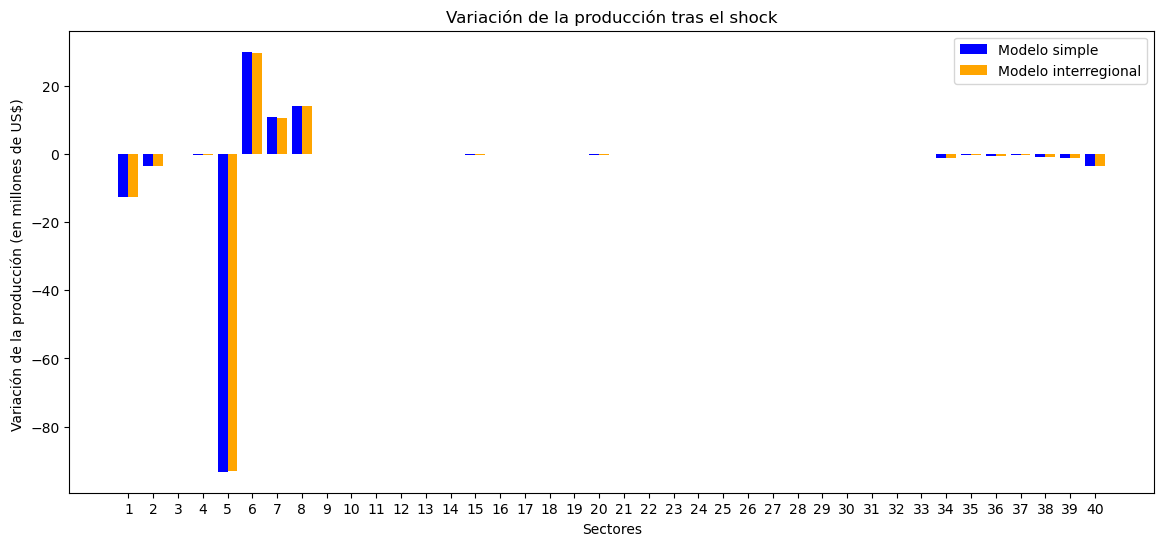

In [266]:
sectores = np.arange(1,41)
fig , ax = plt.subplots(figsize=(14, 6))
ancho = 0.40
ax.bar(sectores - ancho/2, variacion_produccion_simple, width=ancho,label='Modelo simple',color='blue')
ax.bar(sectores + ancho/2, variacion_produccion_compleja, width=ancho,label='Modelo interregional',color='orange')
ax.set_xlabel('Sectores')
ax.set_ylabel('Variación de la producción (en millones de US$) ')
ax.set_title('Variación de la producción tras el shock')
ax.set_xticks(sectores)
ax.set_xticklabels(sectores)
ax.legend()
plt.show()

Como es de esperarse, en ambos modelos los sectores que tuvieron un shock positivo tienen también una variación positiva de la producción, mientras que el sector que sufrió un shock negativo experimenta una disminución en la misma, siendo proporcional al porcentaje de shock. Además, se puede observar que no solo cayó la producción del sector sobre el que se aplicó el shock negativo, sino que también cayeron otros sectores como el 1,2,3, 34,35,36,37,38,39 y 40 lo que indica que dependían en alguna medida de ese sector según el modelo. Por otro lado, podemos concluir que el sector 6 debió aumentar su producción significativamente más que los sectores 7 y 8, a pesar de haber experimentado un incremento equitativo en sus demandas. Esto sugiere que la interdependencia entre sectores puede amplificar los efectos de los shocks en este modelo.

Del gráfico se puede ver que prácticamente no hay diferencias entre usar el modelo intraregional y el interregional para calcular la variación de la producción del pais SLV (por lo menos en este caso). Esto podria indicar que los sectores de SLV se relacionan muy debilmente con los de NIC, lo que hace que sea casi igual usar cualquiera de los dos modelos. 